In [ ]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

print("import succesfull")

import succesfull


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv',parse_dates=['timeStamp'])
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [ ]:
idf=df.set_index('timeStamp')
idf.head()

,demand,precip,temp
timeStamp,,,
2012-01-01 00:00:00,4937.5,0.0,46.13
2012-01-01 01:00:00,4752.1,0.0,45.89
2012-01-01 02:00:00,4542.6,0.0,45.04
2012-01-01 03:00:00,4357.7,0.0,45.03
2012-01-01 04:00:00,4275.5,0.0,42.61


In [ ]:
idf.tail()

,demand,precip,temp
timeStamp,,,
2017-08-12 02:00:00,NaN,0.0000,70.84
2017-08-12 03:00:00,NaN,0.0000,70.57
2017-08-12 04:00:00,NaN,0.0000,69.89
2017-08-12 05:00:00,NaN,0.0000,68.59
2017-08-12 06:00:00,NaN,0.0031,67.33


In [ ]:
missing=df.query('demand!=demand')

In [ ]:
idf['demand']=idf['demand'].fillna(method='ffill')
idf['precip']=idf['precip'].fillna(method='ffill')
idf['temp']=idf['temp'].fillna(method='ffill')
idf.query('demand!=demand')

In [ ]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49205 entries, 2012-01-01 00:00:00 to 2017-08-12 06:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   demand  49205 non-null  float64
 1   precip  49205 non-null  float64
 2   temp    49205 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f21ec053b70>,
      dtype=object)

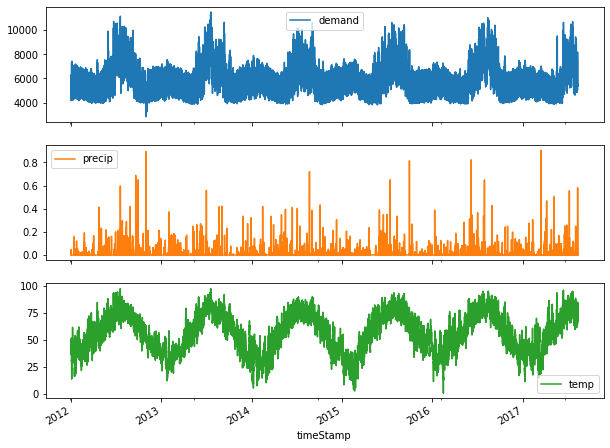

In [ ]:
idf.plot(subplots=True)

In [ ]:

!pip install pmdarima

In [ ]:
idf.shape

(49205, 3)

In [ ]:
idf.resample('M').mean()

In [ ]:
idf=idf.resample('M').mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f21eb6187f0>,
      dtype=object)

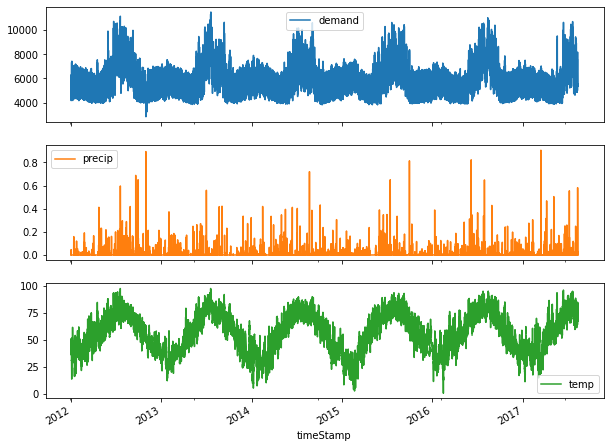

In [ ]:
idf.plot(subplots=True)

In [ ]:
import pmdarima as pm

In [ ]:
#idf.reset_index()['timeStamp']

0    2012-01-31
1    2012-02-29
2    2012-03-31
3    2012-04-30
4    2012-05-31
        ...    
63   2017-04-30
64   2017-05-31
65   2017-06-30
66   2017-07-31
67   2017-08-31
Name: timeStamp, Length: 68, dtype: datetime64[ns]

In [ ]:
model=pm.auto_arima(idf['demand'],
                    start_p=0,d=0,start_q=0,max_order=5,seasonal=True,m=12,
                    test='adf',error_action = 'ignore',suppress_warnings =True,
                      stepwise =True,trace = True)

In [ ]:
model.summary()

In [ ]:
train=idf[(idf.index.get_level_values(0)>='2012-01-31') & (idf.index.get_level_values(0)<='2017-04-30')]
test=idf[idf.index.get_level_values(0)>'2017-04-30']

In [ ]:
print(train.shape)
print(test.shape)

(64, 3)
(4, 3)


In [ ]:
test

,demand,precip,temp
timeStamp,,,
2017-05-31,5421.315935,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625
2017-07-31,7309.246677,0.002272,76.395270
2017-08-31,6971.501248,0.008961,73.730258


In [ ]:
model.fit(train['demand'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
forecast=model.predict(n_periods=4, return_conf_int= True)

In [ ]:
forecast

(array([5322.11811815, 6205.60422635, 7187.96519177, 7302.3769892 ]),
 array([[4724.96265517, 5919.27358112],
        [5401.98230064, 7009.22615205],
        [6361.51375988, 8014.41662366],
        [6471.18870724, 8133.56527117]]))

In [ ]:
forecast_df= pd.DataFrame(forecast[0],index=test.index,columns=['Predictions'])

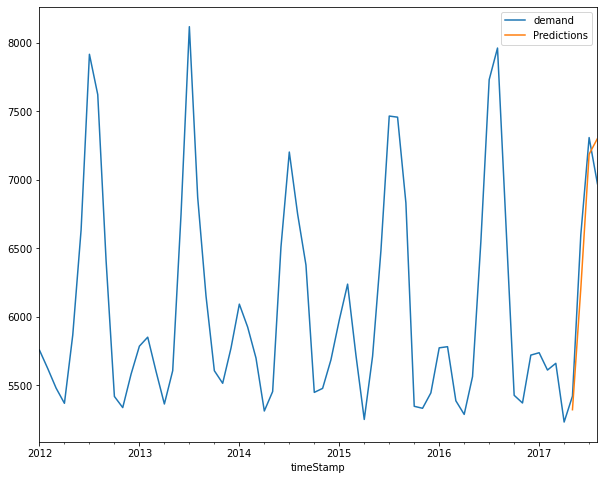

In [ ]:
pd.concat([idf['demand'],forecast_df['Predictions']],axis=1).plot()

In [ ]:
date_range=pd.date_range(start='2017-05-31',periods=20,freq='M')

In [ ]:
n_forecast=model.predict(n_periods=20,return_conf_int=True)
n_forecast_df=pd.DataFrame(n_forecast[0],index=date_range,columns=['Predictions_8'])

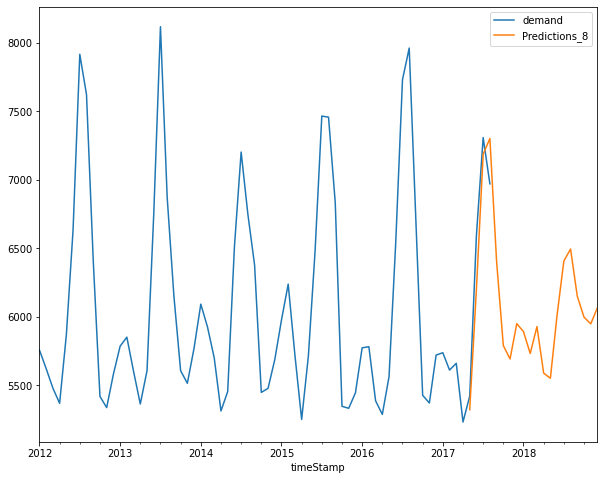

In [ ]:
pd.concat([idf['demand'],n_forecast_df['Predictions_8']],axis=1).plot()

In [ ]:
lower=pd.Series(n_forecast[1][:,0],index=date_range)
higher=pd.Series(n_forecast[1][:,1],index=date_range)

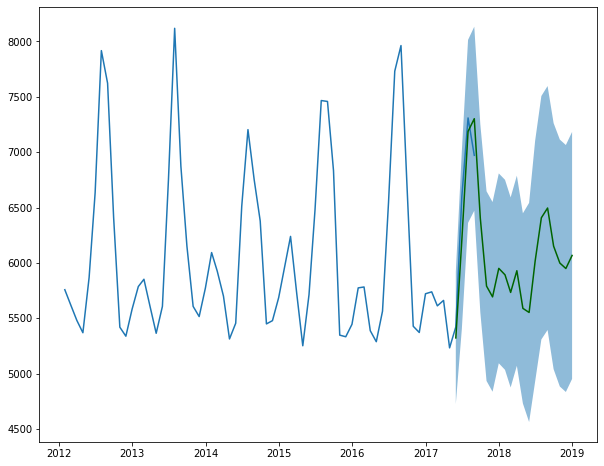

In [ ]:

plt.plot(idf['demand'])
plt.plot(n_forecast_df,color='darkgreen')
plt.fill_between(date_range,
                  lower,
                  higher,alpha = 1.5)

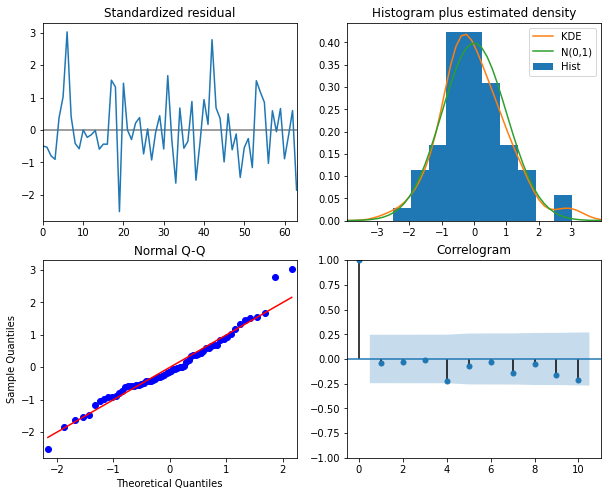

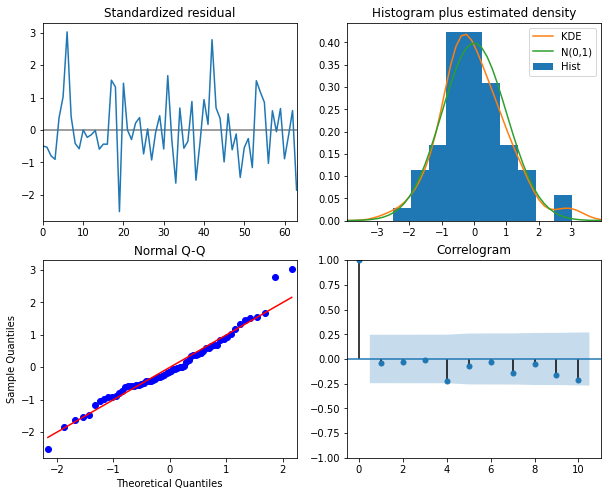

In [ ]:
model.plot_diagnostics()